<a href="https://colab.research.google.com/github/Khushim8/OIBSIP/blob/Sales_Pred/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

<Axes: xlabel='TV', ylabel='Radio'>

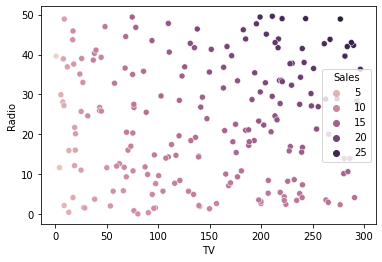

In [ ]:
sns.scatterplot(data=df, x="TV", y="Radio", hue="Sales")

In [ ]:
df.shape

(200, 5)

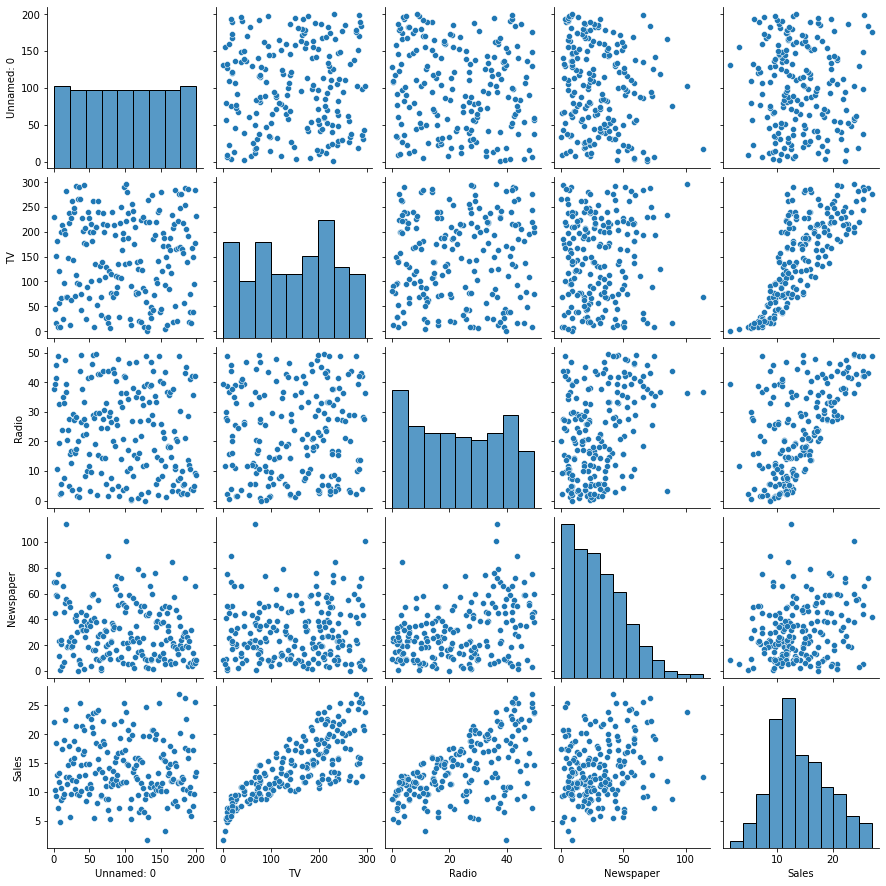

In [ ]:
sns.pairplot(data=df)

In [ ]:
df1=df[["TV","Radio","Newspaper","Sales"]].copy()

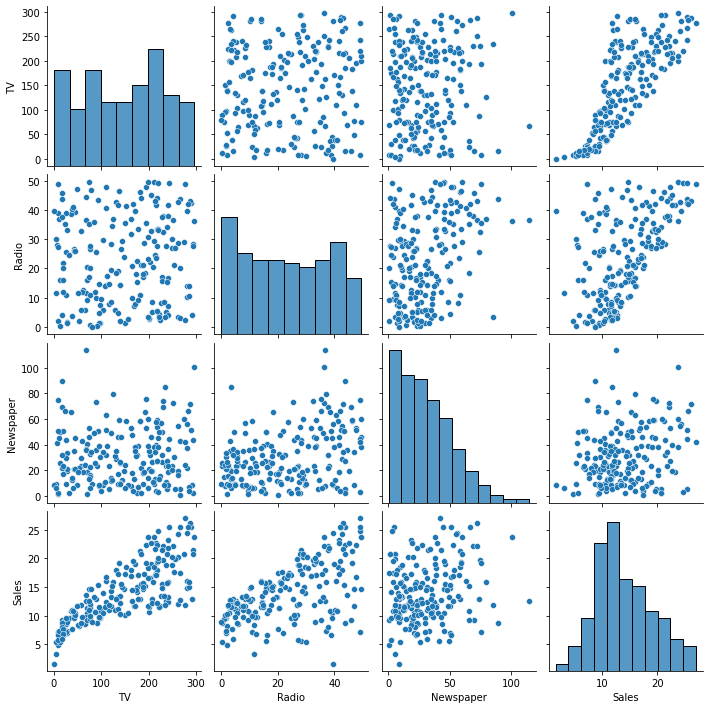

In [ ]:
sns.pairplot(data=df1)

In [ ]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

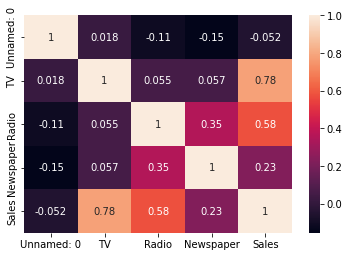

In [ ]:
sns.heatmap(df.corr() ,annot=True)

In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.25, random_state = 45)

In [ ]:
sc_x = StandardScaler()

In [ ]:
xtrain = sc_x.fit_transform(x_train) 

In [ ]:
xtest = sc_x.transform(x_test)

In [ ]:
LR = LogisticRegression(random_state = 0)

In [ ]:
x_train = x_train.astype(int)
x_test = x_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
LR.fit(xtrain,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = LR.predict(xtest)
y_pred

array([11,  9, 14, 21, 11,  9, 19,  9, 21,  9,  7,  9, 11, 18, 11,  7, 11,
        7, 21,  1, 15,  5, 11, 11, 15,  9, 20, 12, 14, 12, 25, 23, 20, 15,
       12,  9, 14, 20, 11, 18, 14, 11,  9, 11, 25, 11, 14,  9, 21, 14])

In [ ]:
LR.intercept_

array([-1.40394099, -1.31855956, -1.67399001, -0.53362152, -0.3926983 ,
       -0.23075425,  0.36409883,  0.90849034,  1.4391344 ,  1.57505587,
        1.73302536,  0.99521749,  1.53664389,  1.49058412,  0.62399607,
        0.82024836,  0.43668894,  0.24885133, -0.11437527, -0.34678984,
       -0.58847898, -1.23817392, -1.07493042, -1.32172421, -1.93399776])

In [ ]:
LR.coef_

array([[ 2.52429263e-01, -9.13449166e-01,  5.22624991e-01,
        -6.29795638e-01],
       [ 4.56264197e-01, -9.96663256e-01, -5.01833292e-01,
        -5.77905767e-01],
       [-9.30172099e-01, -9.58330983e-01, -9.02726396e-01,
        -7.81846300e-01],
       [-4.03524377e-02, -2.34866390e+00, -8.73276455e-01,
        -6.95006755e-02],
       [ 4.56663306e-01, -1.81453238e+00, -7.75786199e-01,
         1.70964644e-01],
       [ 4.20361049e-01, -2.01885796e+00, -8.73175812e-01,
         6.36220612e-01],
       [ 3.14109174e-01, -1.45036300e+00, -9.35353995e-01,
         2.71198520e-01],
       [-4.69403284e-01, -1.43645558e+00, -8.66616393e-01,
        -3.79662364e-01],
       [-8.88153707e-02, -7.47019863e-01, -9.52040461e-01,
        -2.34430734e-01],
       [-2.77241454e-01, -5.74476044e-02, -1.45478323e+00,
         1.78332851e-01],
       [ 8.28128082e-02,  3.29465991e-02, -1.03691057e+00,
         5.59402578e-01],
       [ 8.41715182e-02,  2.69413447e-01, -5.60831788e-01,
      

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.16


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7770491803278688

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse



2.3323807579381204

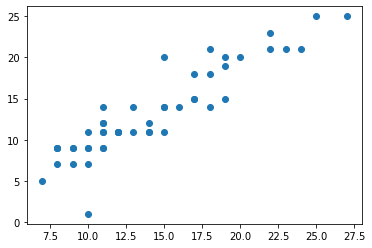

In [ ]:
plt.scatter(y_test, y_pred)